In [10]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [0]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [12]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [13]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [15]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of testing examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of testing examples : 10000 and each image is of shape (784)


In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [17]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
from keras.models import Sequential 
from keras.layers import Dense, Activation ,BatchNormalization,Dropout


In [0]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

# 2 LAYER ARCHITECTURE

In [0]:
# Multilayer perceptron

# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.070  => N(0,σ) = N(0,0.070)
# h2 =>  σ=√(2/(fan_in) = 0.125  => N(0,σ) = N(0,0.365)
# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)

model_relu = Sequential()

model_relu.add(Dense(400, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.070, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(150, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.365, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))


model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

W0703 08:39:47.294071 140323116509056 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 400)               314000    
_________________________________________________________________
batch_normalization_3 (Batch (None, 400)               1600      
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 150)               60150     
_________________________________________________________________
batch_normalization_4 (Batch (None, 150)               600       
_________________________________________________________________
dropout_2 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 10)                1510      
Total para

In [0]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 159us/step - loss: 0.5707 - acc: 0.8238 - val_loss: 0.1844 - val_acc: 0.9447
Epoch 2/20
60000/60000 [==============================] - 9s 143us/step - loss: 0.2775 - acc: 0.9182 - val_loss: 0.1379 - val_acc: 0.9574
Epoch 3/20
60000/60000 [==============================] - 9s 145us/step - loss: 0.2169 - acc: 0.9349 - val_loss: 0.1109 - val_acc: 0.9662
Epoch 4/20
60000/60000 [==============================] - 9s 147us/step - loss: 0.1825 - acc: 0.9440 - val_loss: 0.1007 - val_acc: 0.9675
Epoch 5/20
60000/60000 [==============================] - 9s 144us/step - loss: 0.1616 - acc: 0.9514 - val_loss: 0.0917 - val_acc: 0.9725
Epoch 6/20
60000/60000 [==============================] - 9s 144us/step - loss: 0.1429 - acc: 0.9567 - val_loss: 0.0891 - val_acc: 0.9727
Epoch 7/20
60000/60000 [==============================] - 9s 145us/step - loss: 0.1340 - acc: 0.9591 - val_loss: 0.0818 -

Test score: 0.061721915223333056
Test accuracy: 0.9814


<IPython.core.display.Javascript object>

Text(0.5, 0, 'epoch')

Text(0, 0.5, 'Categorical Crossentropy Loss')

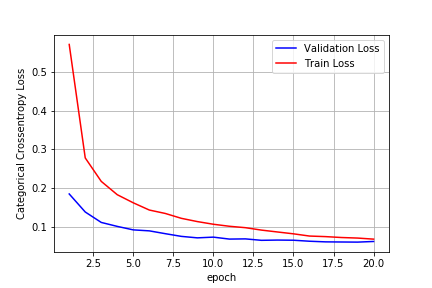

In [0]:
from IPython.display import Image

score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']
ax.plot(x, vy, 'b', label="Validation Loss")
ax.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.grid()

fig.savefig('my_figure.png')
Image('my_figure.png')

# 3 LAYER ARCHITECTURE

In [0]:
# Multilayer perceptron

# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.577  => N(0,σ) = N(0,0.0577)
# h2 =>  σ=√(2/(fan_in) = 0.08160  => N(0,σ) = N(0,0.08160)
# h3 =>  σ=√(2/(fan_in) = 0.089  => N(0,σ) = N(0,0.089)
# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)

model_relu = Sequential()

model_relu.add(Dense(600, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.05777, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(300, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.086160, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(250, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.089, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))


model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 600)               471000    
_________________________________________________________________
batch_normalization_5 (Batch (None, 600)               2400      
_________________________________________________________________
dropout_3 (Dropout)          (None, 600)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 300)               180300    
_________________________________________________________________
batch_normalization_6 (Batch (None, 300)               1200      
_________________________________________________________________
dropout_4 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 250)               75250     
__________

In [0]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 17s 287us/step - loss: 0.5541 - acc: 0.8314 - val_loss: 0.1622 - val_acc: 0.9487
Epoch 2/20
60000/60000 [==============================] - 15s 251us/step - loss: 0.2404 - acc: 0.9271 - val_loss: 0.1169 - val_acc: 0.9639
Epoch 3/20
60000/60000 [==============================] - 15s 250us/step - loss: 0.1830 - acc: 0.9445 - val_loss: 0.0945 - val_acc: 0.9704
Epoch 4/20
60000/60000 [==============================] - 15s 252us/step - loss: 0.1553 - acc: 0.9527 - val_loss: 0.0866 - val_acc: 0.9734
Epoch 5/20
60000/60000 [==============================] - 15s 252us/step - loss: 0.1371 - acc: 0.9585 - val_loss: 0.0793 - val_acc: 0.9754
Epoch 6/20
60000/60000 [==============================] - 15s 251us/step - loss: 0.1208 - acc: 0.9625 - val_loss: 0.0743 - val_acc: 0.9769
Epoch 7/20
60000/60000 [==============================] - 15s 252us/step - loss: 0.1109 - acc: 0.9661 - val_loss: 0.

Test score: 0.05849258915645769
Test accuracy: 0.9837


<IPython.core.display.Javascript object>

Text(0.5, 0, 'epoch')

Text(0, 0.5, 'Categorical Crossentropy Loss')

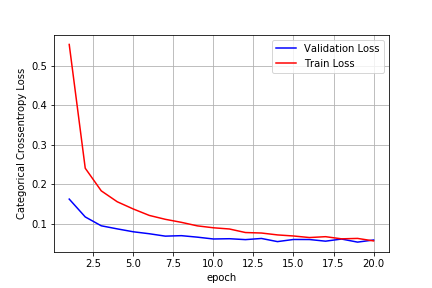

In [0]:
from IPython.display import Image

score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']
ax.plot(x, vy, 'b', label="Validation Loss")
ax.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.grid()

fig.savefig('my_figure.png')
Image('my_figure.png')

# 5 LAYER ARCHITECTURE

In [0]:
# Multilayer perceptron

# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.577  => N(0,σ) = N(0,0.0577)
# h2 =>  σ=√(2/(fan_in) = 0.125  => N(0,σ) = N(0,0.08160)
# h3 =>  σ=√(2/(fan_in) = 0.063  => N(0,σ) = N(0,0.063)
# h4 =>  σ=√(2/(fan_in) = 0.0.070  => N(0,σ) = N(0,0.070710)
# h5 =>  σ=√(2/(fan_in) = 0.089  => N(0,σ) = N(0,0.089)

# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)

model_relu = Sequential()

model_relu.add(Dense(600, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.05777, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(500, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.08160, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(400, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.063, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))


model_relu.add(Dense(300, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.070710, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(250, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.089, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))


model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 600)               471000    
_________________________________________________________________
batch_normalization_8 (Batch (None, 600)               2400      
_________________________________________________________________
dropout_6 (Dropout)          (None, 600)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 500)               300500    
_________________________________________________________________
batch_normalization_9 (Batch (None, 500)               2000      
_________________________________________________________________
dropout_7 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 400)               200400    
__________

In [0]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 25s 422us/step - loss: 0.9081 - acc: 0.7225 - val_loss: 0.2192 - val_acc: 0.9360
Epoch 2/20
60000/60000 [==============================] - 23s 379us/step - loss: 0.3205 - acc: 0.9048 - val_loss: 0.1488 - val_acc: 0.9564
Epoch 3/20
60000/60000 [==============================] - 23s 380us/step - loss: 0.2346 - acc: 0.9307 - val_loss: 0.1135 - val_acc: 0.9648
Epoch 4/20
60000/60000 [==============================] - 23s 383us/step - loss: 0.1962 - acc: 0.9434 - val_loss: 0.1028 - val_acc: 0.9701
Epoch 5/20
60000/60000 [==============================] - 23s 377us/step - loss: 0.1743 - acc: 0.9489 - val_loss: 0.0888 - val_acc: 0.9740
Epoch 6/20
60000/60000 [==============================] - 23s 382us/step - loss: 0.1531 - acc: 0.9556 - val_loss: 0.0904 - val_acc: 0.9741
Epoch 7/20
60000/60000 [==============================] - 23s 377us/step - loss: 0.1362 - acc: 0.9600 - val_loss: 0.

Test score: 0.060072776254452766
Test accuracy: 0.9832


<IPython.core.display.Javascript object>

Text(0.5, 0, 'epoch')

Text(0, 0.5, 'Categorical Crossentropy Loss')

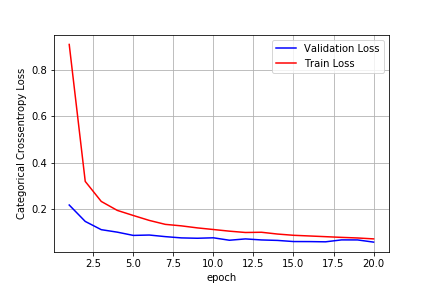

In [0]:
from IPython.display import Image

score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']
ax.plot(x, vy, 'b', label="Validation Loss")
ax.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.grid()

fig.savefig('my_figure.png')
Image('my_figure.png')

# 5 Layers with Dropout Only

In [35]:
# Multilayer perceptron

# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.577  => N(0,σ) = N(0,0.05345224838248488)
# h2 =>  σ=√(2/(fan_in) = 0.125  => N(0,σ) = N(0,0.06030226891555272)
# h3 =>  σ=√(2/(fan_in) = 0.063  => N(0,σ) = N(0,0.07161148740394328)
# h4 =>  σ=√(2/(fan_in) = 0.0.070  => N(0,σ) = N(0,0.08304547985373997)
# h5 =>  σ=√(2/(fan_in) = 0.089  => N(0,σ) = N(0,0.054635836470815304)

# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)

model_relu = Sequential()

model_relu.add(Dense(700, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.05345224838248488, seed=None)))
model_relu.add(Dropout(0.8))

model_relu.add(Dense(550, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.06030226891555272, seed=None)))
model_relu.add(Dropout(0.7))

model_relu.add(Dense(390, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.07161148740394328, seed=None)))
model_relu.add(Dropout(0.6))


model_relu.add(Dense(290, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.08304547985373997, seed=None)))
model_relu.add(Dropout(0.5))

model_relu.add(Dense(670, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.054635836470815304, seed=None)) )
model_relu.add(Dropout(0.9))


model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 700)               549500    
_________________________________________________________________
dropout_12 (Dropout)         (None, 700)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 550)               385550    
_________________________________________________________________
dropout_13 (Dropout)         (None, 550)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 390)               214890    
_________________________________________________________________
dropout_14 (Dropout)         (None, 390)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 290)               113390    
__________

In [36]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

W0704 03:56:17.538640 140598170363776 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 26s 427us/step - loss: 3.2646 - acc: 0.1070 - val_loss: 2.2975 - val_acc: 0.1135
Epoch 2/20
60000/60000 [==============================] - 24s 406us/step - loss: 2.1038 - acc: 0.1981 - val_loss: 2.1920 - val_acc: 0.1313
Epoch 3/20
60000/60000 [==============================] - 25s 409us/step - loss: 1.9128 - acc: 0.2674 - val_loss: 1.8271 - val_acc: 0.2925
Epoch 4/20
60000/60000 [==============================] - 25s 410us/step - loss: 1.6977 - acc: 0.3510 - val_loss: 1.7072 - val_acc: 0.3049
Epoch 5/20
60000/60000 [==============================] - 25s 410us/step - loss: 1.5160 - acc: 0.4136 - val_loss: 1.3148 - val_acc: 0.4619
Epoch 6/20
60000/60000 [==============================] - 23s 390us/step - loss: 1.3668 - acc: 0.4621 - val_loss: 1.1998 - val_acc: 0.4888
Epoch 7/20
60000/60000 [==============================] - 24s 398us/step - loss: 1.2851 - acc: 0.4906 - val_loss: 1.

Test score: 0.6135608936309814
Test accuracy: 0.7438


<IPython.core.display.Javascript object>

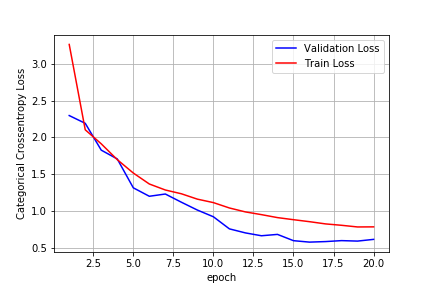

In [37]:
from IPython.display import Image

score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']
ax.plot(x, vy, 'b', label="Validation Loss")
ax.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.grid()

fig.savefig('my_figure.png')
Image('my_figure.png')

# 4 Layers with Alternate Dropout Layer

In [0]:
# Multilayer perceptron

# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.577  => N(0,σ) = N(0,0.05345224838248488)
# h2 =>  σ=√(2/(fan_in) = 0.125  => N(0,σ) = N(0,0.06030226891555272)
# h3 =>  σ=√(2/(fan_in) = 0.063  => N(0,σ) = N(0,0.07161148740394328)
# h4 =>  σ=√(2/(fan_in) = 0.0.070  => N(0,σ) = N(0,0.08304547985373997)
# h5 =>  σ=√(2/(fan_in) = 0.089  => N(0,σ) = N(0,0.054635836470815304)

# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)

model_relu = Sequential()

model_relu.add(Dense(700, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.05345224838248488, seed=None)))

model_relu.add(Dense(390, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.07161148740394328, seed=None)))
model_relu.add(Dropout(0.6))

model_relu.add(Dense(290, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.08304547985373997, seed=None)))

model_relu.add(Dense(670, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.054635836470815304, seed=None)) )
model_relu.add(Dropout(0.9))


model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

In [38]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 24s 402us/step - loss: 0.7846 - acc: 0.7489 - val_loss: 0.6006 - val_acc: 0.7728
Epoch 2/20
60000/60000 [==============================] - 23s 384us/step - loss: 0.7565 - acc: 0.7486 - val_loss: 0.5725 - val_acc: 0.7844
Epoch 3/20
60000/60000 [==============================] - 24s 392us/step - loss: 0.7591 - acc: 0.7500 - val_loss: 0.5997 - val_acc: 0.7781
Epoch 4/20
60000/60000 [==============================] - 23s 381us/step - loss: 0.7426 - acc: 0.7535 - val_loss: 0.5735 - val_acc: 0.7786
Epoch 5/20
60000/60000 [==============================] - 23s 387us/step - loss: 0.7426 - acc: 0.7555 - val_loss: 0.5269 - val_acc: 0.8020
Epoch 6/20
60000/60000 [==============================] - 23s 383us/step - loss: 0.7343 - acc: 0.7577 - val_loss: 0.5624 - val_acc: 0.7822
Epoch 7/20
60000/60000 [==============================] - 23s 381us/step - loss: 0.7319 - acc: 0.7572 - val_loss: 0.

Test score: 0.46890072317123416
Test accuracy: 0.8242


<IPython.core.display.Javascript object>

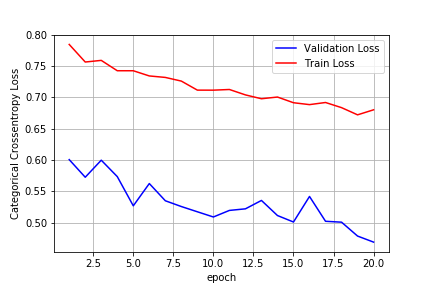

In [39]:
from IPython.display import Image

score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']
ax.plot(x, vy, 'b', label="Validation Loss")
ax.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.grid()

fig.savefig('my_figure.png')
Image('my_figure.png')

It can be clearly observe that this model is overfitting, because we had not used the dropouts layers after every layer.

# CONCLUSION

In [0]:
from prettytable import PrettyTable
table=PrettyTable(['NO. OF HIDDEN LAYERS','NO. OF NEURONS IN EACH LAYER AND ARCHITECTURE','BATCH NORMALISATION','DROPOUT','Categorical Crossentropy Loss','ACCURACY'])

table.add_row(['2','IP->400->BN->DP->150->BN->DP->OP','YES','YES','0.0617','0.9814'])
table.add_row(['3','IP->600->BN->DP->300->BN->DP->250->BN->DP->OP','YES','YES','0.0585','0.9837'])
table.add_row(['5','IP->600->BN->DP->500->BN->DP->400->BN->DP->300->BN->DP->250->BN->DP->OP','YES','YES','0.0601','0.9832'])
table.add_row(['5','IP->700->DP->550->DP->390->DP->290->DP->670->DP->OP','NO','YES','0.61356','74.38'])
table.add_row(['4','IP->790->390->DP->290->670->DP->OP','NO','YES','0.469','82.42'])





In [53]:
print('ABBREVATIONS \n1.BN-> BATCH NORMALISATION\n2.DP-> DROPOUTS\n3.IP-> INPUT LAYER\n4.OP-> OUTPUT LAYER')
print(table)

ABBREVATIONS 
1.BN-> BATCH NORMALISATION
2.DP-> DROPOUTS
3.IP-> INPUT LAYER
4.OP-> OUTPUT LAYER
+----------------------+-------------------------------------------------------------------------+---------------------+---------+-------------------------------+----------+
| NO. OF HIDDEN LAYERS |              NO. OF NEURONS IN EACH LAYER AND ARCHITECTURE              | BATCH NORMALISATION | DROPOUT | Categorical Crossentropy Loss | ACCURACY |
+----------------------+-------------------------------------------------------------------------+---------------------+---------+-------------------------------+----------+
|          2           |                     IP->400->BN->DP->150->BN->DP->OP                    |         YES         |   YES   |             0.0617            |  0.9814  |
|          3           |              IP->600->BN->DP->300->BN->DP->250->BN->DP->OP              |         YES         |   YES   |             0.0585            |  0.9837  |
|          5           | IP->600->